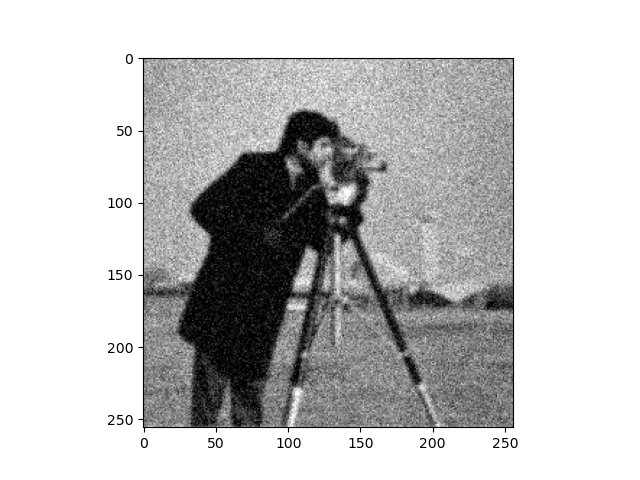

PSNR blurred image 16.313347655863858


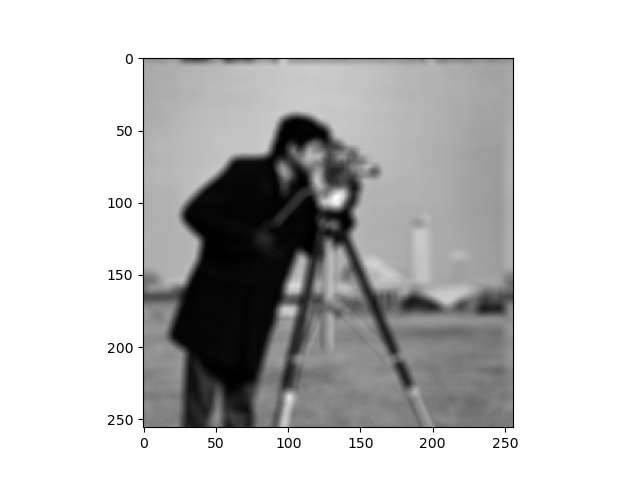

PSNR gaussian image (-61.72627006663354+13.4147065498226j)


In [19]:
%matplotlib ipympl
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RectangleSelector
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.io import imread
import matplotlib
import skimage.restoration as restoration

import skimage.filters.rank as rank
plt.gray()
def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

def PSNR(f: np.ndarray, g: np.ndarray):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

class Selector:
    def __init__(self, ax):
        self.RS = RectangleSelector(ax, self.line_select_callback,
                                     useblit=True,
                                       button=[1, 3],  
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
        self.bbox = [None, None, None, None]
        
    def line_select_callback(self,eclick, erelease):
        'eclick and erelease are the press and release events'
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        self.bbox = [int(y1), int(y2), int(x1), int(x2)]
    def get_bbox(self):
        return self.bbox

f = imread('cameraman.tiff').astype(np.float64)/255
I = imread('degraded.tif').astype(np.float64)/255
plt.imshow(I)
plt.show()


#Image Restoration in Freq Domain
h_d = disk(4) 
h = np.zeros((256,256)) 
h[0:9,0:9] = h_d / np.sum(h_d)
h = np.roll(h, (-5,-5)) 
h_freq = np.fft.fft2(h) 
f_blurfreq = h_freq*np.fft.fft2(f) 
f_blur = np.real(np.fft.ifft2(f_blurfreq))

#plot blurred image + PSNR
plt.imshow(f_blur)
print("PSNR blurred image", PSNR(f_blur, f))
plt.show() 

#apply inverse filtering to it by dividing the image 
f_blur_inverted = f_blur/h_freq
# by the blurring function h freq and plot the result
#TO DO

#Now add zero-mean Gaussian noise with a variance of 0.002
f_gaussian = skimage.util.random_noise(f_blur, mode='gaussian', clip=True, var=0.002)
#Apply inverse filtering to the noisy blurred image. 
f_gaussian_inverted = f_gaussian/h_freq
# Plot the restored image and the PSNR
#TO DO
print("PSNR gaussian image", PSNR(f_gaussian_inverted, f))

# some things are not working but i'm hungry and need to get ready so that seems like a later problem , cheers